# PROGGETO Num_1 DATA-ANALYTICS : 19/08/2025
   ###### delmas fouegap

## **Problema**:
*Un'azienda desidera analizzare le prestazioni dei dipendenti per individuare lacune e aree di miglioramento.*

## Descriptive analysis

In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\delma\OneDrive\Bureau\yomiDenzel\Projet_1 Data-Analytics\HRDataset_v14.csv")
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [257]:
df.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

PerformanceScore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64


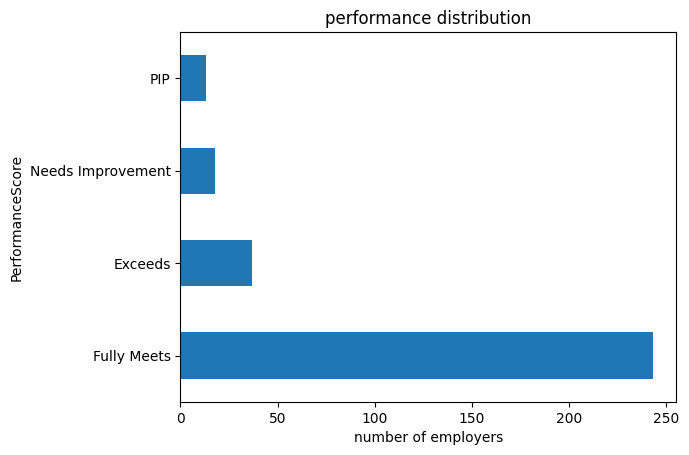

In [258]:
df.shape
dist_ge = df["PerformanceScore"].value_counts()
print(dist_ge)
dist_ge.plot(kind="barh", title="performance distribution")
plt.xlabel("number of employers")
plt.show()


In [259]:
perf_scor_pourc = df["PerformanceScore"].value_counts(normalize=True)
# print(perf_scor_pourc*100)

# df.groupby("PerformanceScore")["Department"].value_counts().unstack()
pd.crosstab(df["PerformanceScore"], df["Department"])



Department,Admin Offices,Executive Office,IT/IS,Production,Sales,Software Engineering
PerformanceScore,,,,,,
Exceeds,0,0,6,27,2,2
Fully Meets,9,1,42,159,24,8
Needs Improvement,0,0,1,15,1,1
PIP,0,0,1,8,4,0


In [260]:
# 4. Quali reparti hanno in media le prestazioni migliori o peggiori?
score_map = {
    "Exceeds":1,
    "Fully Meets":2,	
    "Needs Improvement"	:3,
    "PIP":4
}
df["PerformanceScoreNum"] = df["PerformanceScore"].map(score_map)
df.groupby("Department")["PerformanceScoreNum"].mean().sort_values(ascending=False)

Department
Sales                   2.225806
Production              2.019139
Executive Office        2.000000
Admin Offices           2.000000
IT/IS                   1.940000
Software Engineering    1.909091
Name: PerformanceScoreNum, dtype: float64

In [261]:
# 5. Le prestazioni variano in base al sesso?
print(df["Sex"].value_counts())
pd.crosstab(df["Sex"],df["PerformanceScore"])


Sex
F     176
M     135
Name: count, dtype: int64


PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
Sex,,,,
F,20,142,9,5
M,17,101,9,8


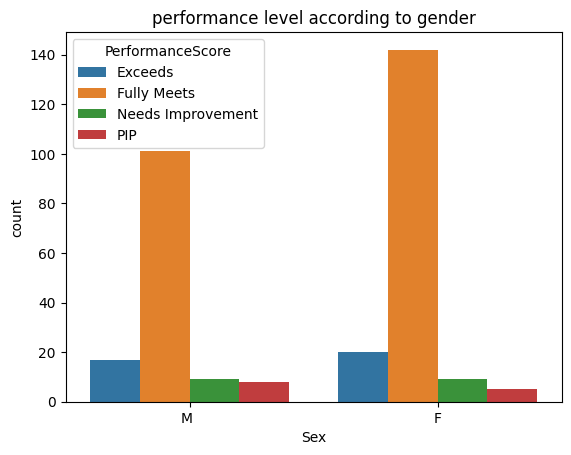

In [262]:
sns.countplot(data=df, x="Sex", hue="PerformanceScore")
plt.title("performance level according to gender")
plt.show()

### 👥 Performance per genere

L'analisi della variabile "Sesso" incrociata con "PerformanceScore" mostra che:

- La maggior parte di uomini e donne è valutata come "Pienamente conforme".
- Ci sono lievi differenze nelle altre categorie, ma nessuna disparità evidente.
- Le donne appaiono leggermente sovrarappresentate in "Superiore", e gli uomini in "Necessita di miglioramenti" e "PIP".

👉 **Conclusione:** In questa fase, la performance sembra essere generalmente bilanciata tra i sessi.

In [263]:
# 5. Le prestazioni variano in base ai progetti realizzati?
pd.crosstab(df["SpecialProjectsCount"],df["PerformanceScore"])


PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
SpecialProjectsCount,,,,
0,29,185,16,11
1,0,0,0,1
2,0,1,0,0
3,1,2,0,0
4,0,8,1,0
5,5,16,0,0
6,1,18,1,1
7,1,11,0,0
8,0,2,0,0


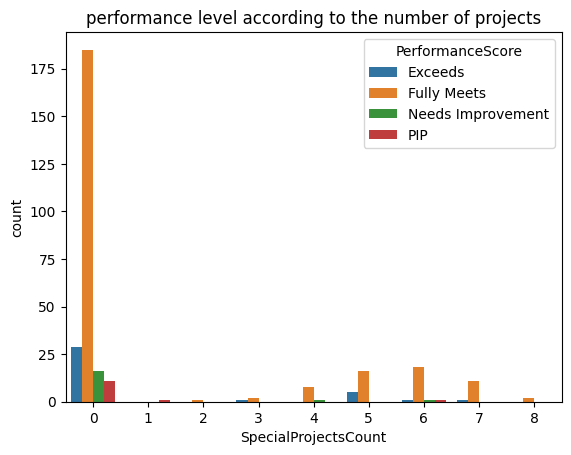

In [264]:
sns.countplot(data=df, x="SpecialProjectsCount", hue="PerformanceScore")
plt.title("performance level according to the number of projects")
plt.show()

### 💼 Coinvolgimento in progetti speciali e performance

L'analisi della variabile `SpecialProjectsCount` mostra che:

- I dipendenti che hanno partecipato a **più di 3 progetti speciali** sono per lo più classificati come **Superiori** o **Pienamente conformi**.
- Al contrario, coloro che non hanno partecipato a **nessun progetto speciale** sono più disperdenti su tutti i livelli di performance, inclusi "Necessita di miglioramento" e "PIP".

👉 **Raccomandazione HR:**
Coinvolgere maggiormente i dipendenti in progetti interfunzionali o strategici può contribuire a migliorare le loro performance complessive.

In [265]:
# 5. Le prestazioni variano in base all'anzianità?
x_date = pd.to_datetime(df["DateofHire"], format="%m/%d/%Y")
df["anni"]= x_date.dt.year
pd.crosstab(df["anni"],df["PerformanceScore"])



PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
anni,,,,
2006,1,0,0,0
2007,0,2,0,0
2008,0,2,0,1
2009,1,6,0,0
2010,1,6,1,1
2011,12,63,7,1
2012,2,37,4,2
2013,8,35,1,0
2014,9,41,4,6


In [266]:
#5. I vantaggi variano a seconda della piattaforma di reclutamento?
pd.crosstab(df["RecruitmentSource"],df["PerformanceScore"])


PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
RecruitmentSource,,,,
CareerBuilder,2,17,4,0
Diversity Job Fair,6,18,4,1
Employee Referral,5,25,0,1
Google Search,2,43,3,1
Indeed,12,66,4,5
LinkedIn,9,61,3,3
On-line Web application,0,1,0,0
Other,0,2,0,0
Website,1,10,0,2


In [267]:
#le assenze le influenzano sulle performance?
pd.crosstab(df["PerformanceScore"], df["DaysLateLast30"])


DaysLateLast30,0,1,2,3,4,5,6
PerformanceScore,,,,,,,
Exceeds,37,0,0,0,0,0,0
Fully Meets,240,1,2,0,0,0,0
Needs Improvement,1,0,2,3,6,5,1
PIP,0,0,2,3,2,1,5


## Identification of outliers

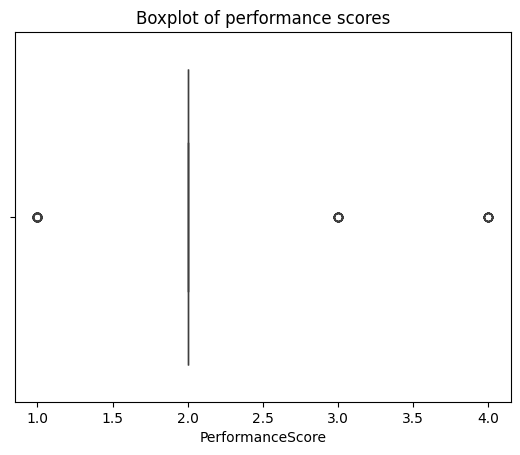

In [268]:
sns.boxplot(x=df["PerformanceScoreNum"])
plt.title("Boxplot of performance scores")
plt.xlabel("PerformanceScore")
plt.show()

In [269]:
#6. Quali dipendenti hanno punteggi di prestazione molto al di sopra o molto al di sotto della media?

##Usiamo la formula IQR
cnt = df["PerformanceScoreNum"].describe()

IQR = cnt.iloc[6] - cnt.iloc[4]
b_inf = cnt.iloc[4] - 1.5 * IQR
b_sup = cnt.iloc[6] + 1.5 * IQR


b_inf, b_sup
df["PerformanceScore"][(df["PerformanceScoreNum"] < b_inf) |  (df["PerformanceScoreNum"] > b_inf) ].value_counts()

PerformanceScore
Exceeds              37
Needs Improvement    18
PIP                  13
Name: count, dtype: int64

In [270]:

#Usiamo la formula del Z-Score

z= (df["PerformanceScoreNum"] - np.mean(df["PerformanceScoreNum"])) / np.std(df["PerformanceScoreNum"])
z
outliers = df["PerformanceScore"][(z > 1.5) | (z < -1.5)].value_counts()
print(df["PerformanceScore"].value_counts())
print("\n❗I valori anomali sono:\n")
print(outliers)

PerformanceScore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64

❗I valori anomali sono:

PerformanceScore
Exceeds              37
Needs Improvement    18
PIP                  13
Name: count, dtype: int64


In [271]:
best_employers = df.loc[z > 1.5, "Employee_Name"]
print("🟢 Employees with very high performance:\n")
print(best_employers)

🟢 Employees with very high performance:

23            Blount, Dianna
53             Cole, Spencer
54         Corleone, Michael
67             Delarge, Alex
69           Desimone, Carl 
72         Dietrich, Jenna  
73            DiNocco, Lily 
83            Erilus, Angela
84         Estremera, Miguel
85            Evensen, April
86            Exantus, Susan
90       Fernandes, Nilson  
91                Fett, Boba
95             Forrest, Alex
105             Gilles, Alex
112           Gonzalez, Juan
137        Immediato, Walter
188              Miller, Ned
190            Monroe, Peter
205             O'hare, Lynn
209            Owad, Clinton
214            Smith, Martin
215        Pelletier, Ermine
236         Robinson, Cherly
246    Saar-Beckles, Melinda
258              Smith, John
263         Sparks, Taylor  
267       Stansfield, Norman
283               Trang, Mei
297         Wallace, Theresa
307       Ybarra, Catherine 
Name: Employee_Name, dtype: object


In [272]:
worse_employers = df.loc[z < -1.5, "Employee_Name"]
print("\n🔴 Employees with very low performance:\n")
print(worse_employers)


🔴 Employees with very low performance:

0      Adinolfi, Wilson  K
5        Anderson, Linda  
12        Barbossa, Hector
16        Beak, Kimberly  
22           Billis, Helen
36          Candie, Calvin
51         Clukey, Elijian
55          Corleone, Vito
76           Dougall, Eric
77            Driver, Elle
96             Foss, Jason
106      Girifalco, Evelyn
111         Gonzalez, Cayo
125         Harrison, Kara
141       Jeannite, Tayana
143        Johnson, George
145          Johnston, Yen
167         Liebig, Ketsia
170      Lindsay, Leonara 
172         Lunquist, Lisa
174         Lynch, Lindsay
191        Monterro, Luisa
201         Ngodup, Shari 
208        Osturnka, Adeel
212       Patronick, Lucas
217         Peters, Lauren
220      Petrowsky, Thelma
232        Rivera, Haley  
237        Robinson, Elias
257             Smith, Joe
265     Squatrito, Kristen
274          Szabo, Andrew
282         Torrence, Jack
289       Veera, Abdellah 
293          Volk, Colleen
304     Winthr

C. Analisi delle cause (fattori esplicativi):

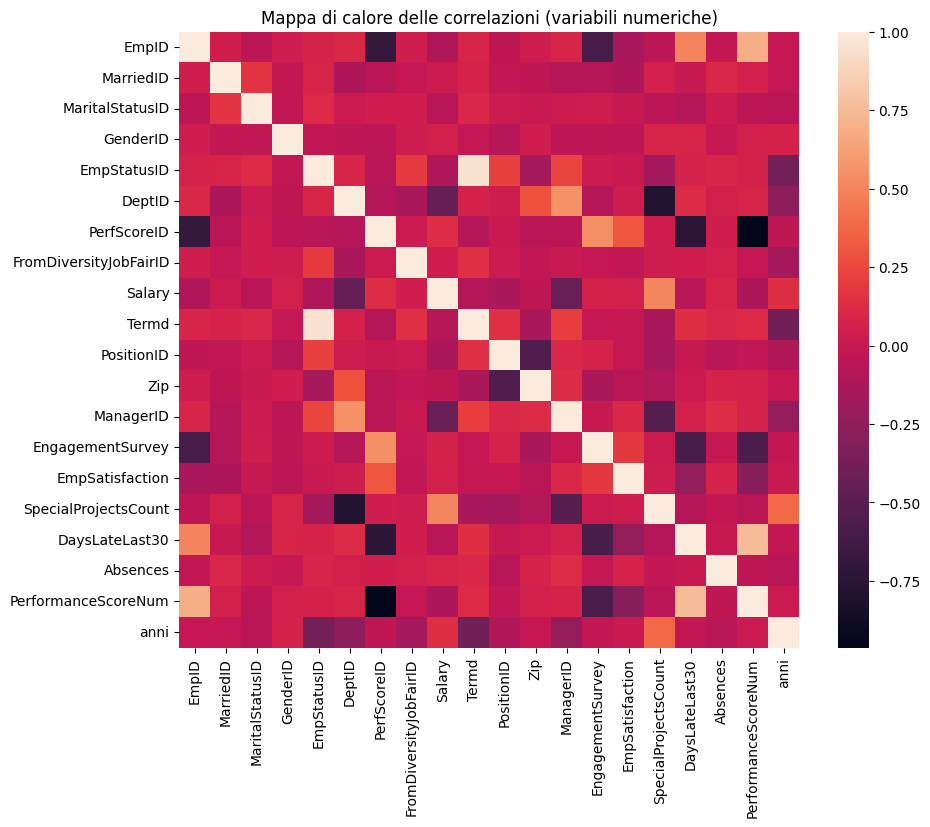

In [273]:
#Quali variabili sembrano essere correlate alle prestazioni

corr_df = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df )
plt.title("Mappa di calore delle correlazioni (variabili numeriche)")
plt.show()


## Nota

Le relazioni lineari tra la maggior parte delle variabili e la variabile **PerformanceScore** sono da deboli a moderate. Non sono evidenti correlazioni forti ed evidenti, il che suggerisce che le variabili siano relativamente indipendenti l'una dall'altra.

In [274]:
#Le prestazioni dipendono dalla fonte di reclutamento?

print(df["RecruitmentSource"].value_counts())
pd.crosstab(df["PerformanceScore"], df["RecruitmentSource"])


RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64


RecruitmentSource,CareerBuilder,Diversity Job Fair,Employee Referral,Google Search,Indeed,LinkedIn,On-line Web application,Other,Website
PerformanceScore,,,,,,,,,
Exceeds,2,6,5,2,12,9,0,0,1
Fully Meets,17,18,25,43,66,61,1,2,10
Needs Improvement,4,4,0,3,4,3,0,0,0
PIP,0,1,1,1,5,3,0,0,2


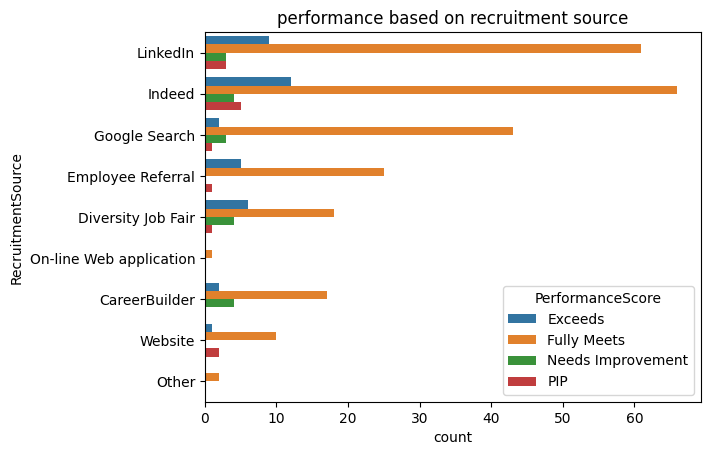

In [275]:
sns.countplot(data=df, y="RecruitmentSource", hue="PerformanceScore")
plt.title("performance based on recruitment source")
plt.show()

### 📊 Performance in base alla fonte di reclutamento

L'analisi del grafico mostra che:

- La maggior parte dei dipendenti reclutati tramite **Indeed** e **LinkedIn** ottiene un punteggio di performance "Pienamente conforme".
- Fonti come **Ricerca Google** e **Employee Referral** presentano anch'esse un numero significativo di dipendenti "Pienamente conformi", ma con una notevole presenza di "Supera" (supera le aspettative).
- Fonti come **Diversity Job Fair**, **CareerBuilder** e **Sito web** presentano principalmente dipendenti "Pienamente conformi", con un numero limitato di candidati che necessitano di miglioramenti o in fase di "PIP".
- Fonti con pochi o nessun candidato, come **Candidatura web online** e **Altro**, mostrano pochi dati disponibili, rendendo l'analisi meno affidabile per queste categorie.

👉 **Raccomandazione per le risorse umane:**
Promuovere il reclutamento tramite **Indeed**, **LinkedIn** e **referenze interne** potrebbe ottimizzare la qualità delle assunzioni in termini di performance, continuando al contempo a monitorare altre fonti per diversificare i profili.

In [276]:
# le prestazioni dipendono dal reparto?
print(df["Department"].value_counts())
pd.crosstab(df["Department"], df["PerformanceScore"])


Department
Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: count, dtype: int64


PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
Department,,,,
Admin Offices,0,9,0,0
Executive Office,0,1,0,0
IT/IS,6,42,1,1
Production,27,159,15,8
Sales,2,24,1,4
Software Engineering,2,8,1,0


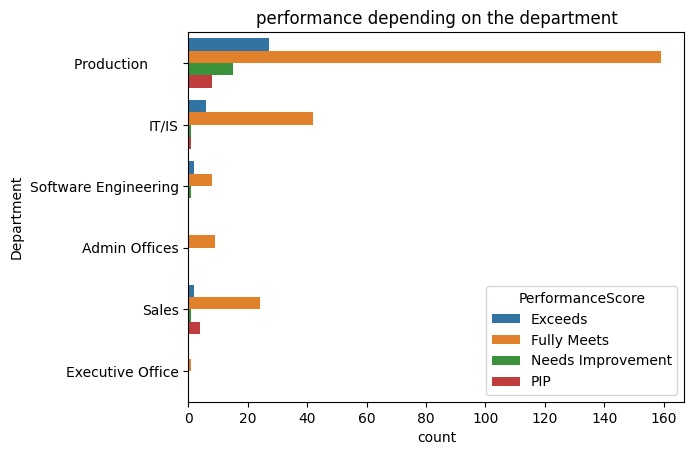

In [277]:
sns.countplot(data=df, y="Department", hue="PerformanceScore")
plt.title("performance depending on the department")
plt.show()

### 📊 Performance per reparto

L'analisi del grafico mostra che:

- Il reparto Produzione ha il maggior numero di dipendenti con performance classificate principalmente come "Pienamente conformi".
- Anche i reparti IT/IS, Ingegneria del Software e Amministrazione hanno una maggioranza di dipendenti nella categoria "Pienamente conformi".
- I livelli di performance "Superiori" sono meno comuni ma presenti in tutti i reparti, in particolare in Produzione, IT/IS e Vendite.
- Le categorie "Needs Improvement" e "PIP" (Performance Improvement Plan) sono in minoranza ma presenti in diversi reparti, in particolare in Produzione e Vendite.

👉 **Raccomandazione HR:**
Concentrare gli sforzi sui reparti con tassi più elevati di casi "Needs Improvement" e "PIP", come Produzione e Vendite, fornendo supporto mirato potrebbe contribuire a migliorare le performance complessive. Inoltre, incoraggiare le buone pratiche nei reparti con un alto tasso di "Pienamente conformi" potrebbe fungere da modello.

In [278]:
#le prestazioni sono influenzate dallo statuto matrimoniale?
print(df["MaritalDesc"].value_counts())
pd.crosstab(df["MaritalDesc"], df["PerformanceScore"])

MaritalDesc
Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: count, dtype: int64


PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
MaritalDesc,,,,
Divorced,5,23,2,0
Married,11,100,7,6
Separated,2,9,0,1
Single,18,104,9,6
Widowed,1,7,0,0


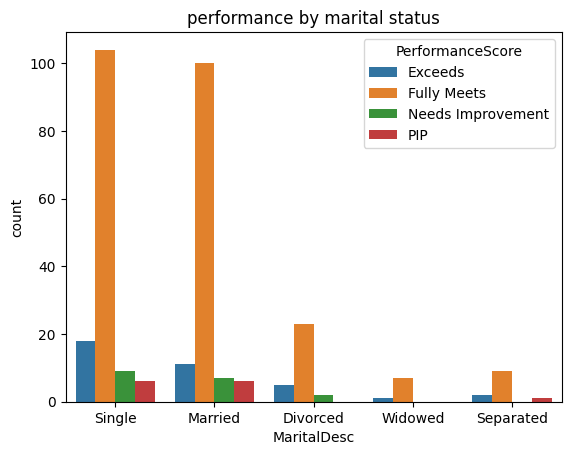

In [279]:
sns.countplot(data=df, x="MaritalDesc", hue="PerformanceScore")
plt.title("performance by marital status")
plt.show()

### 💍 Stato civile e performance

L'analisi della variabile **MaritalDesc** (stato civile) in relazione al **PerformanceScore** rivela che:

- I dipendenti **Celibe** e **Sposati** sono i più numerosi, con una maggioranza che mostra performance **Pienamente conforme**.
- Gli stati **Divorziato**, **Vedovo** e **Separato** sono meno rappresentati, ma seguono un trend simile, dominato da performance "Pienamente conforme".
- I livelli di performance **Necessita di Miglioramento** e **PIP** sono poco frequenti, indipendentemente dallo stato civile.

👉 **Raccomandazione HR:** Lo stato civile non sembra avere un impatto significativo sulle performance. Tuttavia, rimane importante promuovere un ambiente di lavoro equo e solidale per tutti i dipendenti, indipendentemente dal loro stato personale.